# Group Project - Vegetable Prices

In this project, we will look at a collection of vegetable prices over a period of one year, from 1 January 2023 to 1 January 2024. We will initiate the analysis by performing data cleaning to ensure that the data is optimal for efficient analysis. Thereafter, we will perform Exploratory Data Analysis to uncover trends and anomalies in the data set.

The objective in this analysis is to uncover the most optimal season during the course of a year to purchase wholesale vegetables at the most cost-effective price, based on the historical data available. This will provide an indication of when to purchase the vegetables within the coming year. 

## Data Analysis Process

Here, we begin with the importing and cleaning of the data set to ensure data integrity and accuracy. 

### Importing packages and Data Cleaning

## Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## Load the CSV data 

In [2]:
#Creating the data file for importing
prices_df = pd.read_csv("prices.csv")

#displaying the first 5 rows of the price dataframe
prices_df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [3]:
#Checking the data types of the dataframe
prices_df.info()
prices_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


## Converting datatypes

In [4]:
#Convert the intergers to floats
prices_df[['Tomato', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Elephant Yam (Suran)']] = prices_df[['Tomato', 'Potato', 'Brinjal', 'Garlic', 'Peas', 'Methi', 'Elephant Yam (Suran)']].astype(float)

#Convert the date format
prices_df["Price Dates"] = pd.to_datetime(prices_df["Price Dates"], format="%d-%m-%Y")
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Price Dates             287 non-null    datetime64[ns]
 1   Bhindi (Ladies finger)  287 non-null    float64       
 2   Tomato                  287 non-null    float64       
 3   Onion                   287 non-null    float64       
 4   Potato                  287 non-null    float64       
 5   Brinjal                 287 non-null    float64       
 6   Garlic                  287 non-null    float64       
 7   Peas                    287 non-null    float64       
 8   Methi                   287 non-null    float64       
 9   Green Chilli            287 non-null    float64       
 10  Elephant Yam (Suran)    287 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 24.8 KB


## Exploratory Data Analysis

In order to understand what data, we need to perform EDA. We are looking for any possible trends and/or outliers in the data set that may provide us with greater insight.

### Graph the Trends

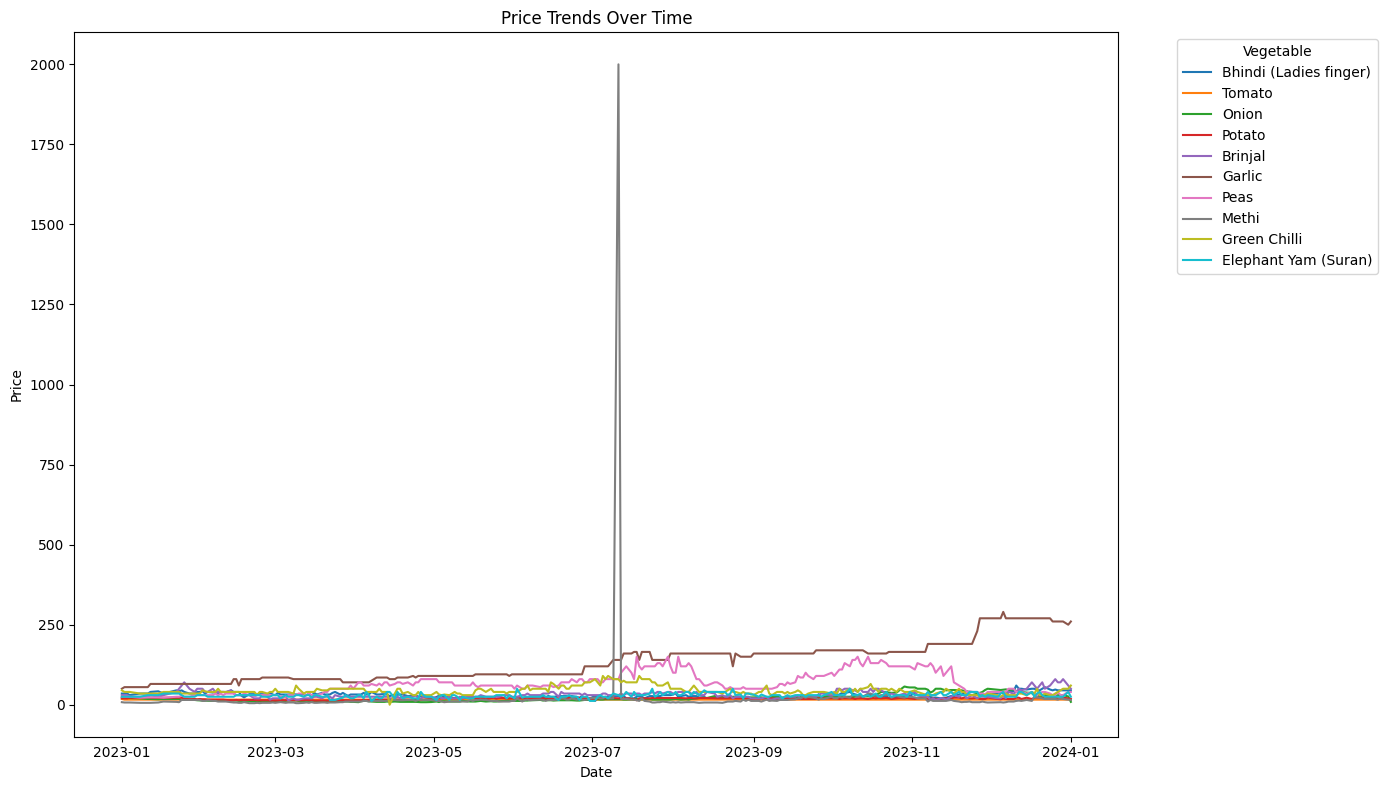

In [13]:
#Size the graph
plt.figure(figsize=(14, 8))

#Plot each vegetable's price trend
for vegetable in prices_df.columns[1:]:  #Skip the first column 'Price Dates'
    plt.plot(prices_df['Price Dates'], prices_df[vegetable], label=vegetable)

plt.title('Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Vegetable', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
from scipy.stats import skew, kurtosis

def price_stat(column):
    """ Calculates Skew and Kurtosis 
        of prices per vegetable column.

        Input: Vegetable column.
        Output: Skew and Kurtosis per vegetable price.

        Results: Skew and Kurtosis of a vegetable's price, 
        as well as a description of the results. """

    
    #Calculating skew & kurtosis
    veg_skew = skew(column)
    veg_kurt = kurtosis(column)
    
    #Create descriptive outputs
    if veg_skew > 1:
        skew_description = "High positive skew"
    elif veg_skew < -1:
        skew_description = "High negative skew"
    elif veg_skew > 0:
        skew_description = "Moderate positive skew"
    elif veg_skew < 0:
        skew_description = "Moderate negative skew"
    else:
        skew_description = "Fairly symmetrical"

    if veg_kurt > 3:
        kurtosis_description = "Significant outliers"
    elif veg_kurt < 3:
        kurtosis_description = "Medium outliers"
    else:
        kurtosis_description = "No outliers"

    #Return results
    results = {
        'Skewness': veg_skew.round(4),
        'Kurtosis': veg_kurt.round(4),
        'Skewness Description': skew_description,
        'Kurtosis Description': kurtosis_description
    }
    
    return results

In [15]:
#Iterate the price stats function to provide results per each vegetable
#Ignore the Price Dates column
for vegetable in prices_df.columns[1:]:
    
    #Check if the column is numeric and has at least one valid number (Error message if not applied)
    if pd.api.types.is_numeric_dtype(prices_df[vegetable]):
        print(f'{vegetable}: {price_stat(prices_df[vegetable])}')
    print() #For readability, print a blank space between results

Bhindi (Ladies finger): {'Skewness': np.float64(0.7922), 'Kurtosis': np.float64(0.3352), 'Skewness Description': 'Moderate positive skew', 'Kurtosis Description': 'Medium outliers'}

Tomato: {'Skewness': np.float64(16.8524), 'Kurtosis': np.float64(282.0035), 'Skewness Description': 'High positive skew', 'Kurtosis Description': 'Significant outliers'}

Onion: {'Skewness': np.float64(1.2548), 'Kurtosis': np.float64(0.6598), 'Skewness Description': 'High positive skew', 'Kurtosis Description': 'Medium outliers'}

Potato: {'Skewness': np.float64(-0.6801), 'Kurtosis': np.float64(-0.7392), 'Skewness Description': 'Moderate negative skew', 'Kurtosis Description': 'Medium outliers'}

Brinjal: {'Skewness': np.float64(1.5183), 'Kurtosis': np.float64(2.7875), 'Skewness Description': 'High positive skew', 'Kurtosis Description': 'Medium outliers'}

Garlic: {'Skewness': np.float64(0.851), 'Kurtosis': np.float64(-0.0295), 'Skewness Description': 'Moderate positive skew', 'Kurtosis Description': 'Med

The price_stat function confirms the existence of outliers in the dataset.

## Correcting the Outliers

In [5]:
#Our central tendecy table showed that there is an outlier in the Methi data.
#Find the median for Methi

median_methi = np.median(prices_df['Methi'])
print(median_methi)

#Replace the outlier with the median
prices_df['Methi'] = np.where(prices_df['Methi'] == 2000, median_methi,prices_df['Methi'])
prices_df.describe()

12.0


,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,2023-07-04 21:54:33.867595776,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,13.456446,44.122404,28.797909
min,2023-01-01 00:00:00,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,2023-04-06 12:00:00,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,2023-07-04 00:00:00,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,2023-10-01 12:00:00,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,2024-01-01 00:00:00,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,35.000000,90.000000,50.000000
std,NaN,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,6.256523,12.796590,6.607973


## Create a column with the Seasons
We do this so we are able to analyse seasonal trends

In [6]:
#Create column defining the Seasons based on months
#Seasons in India taken from India Meteorological Department(IMD). See README file

prices_df['Season'] = prices_df['Price Dates'].dt.month.apply(lambda x: 'Winter' if x in [12, 1, 2] else
                                                                        'Summer' if x in [3, 4, 5] else
                                                                        'Rainy' if x in [6, 7, 8] else
                                                                        'Autumn')
prices_df.head(100)

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran),Season
0,2023-01-01,35.0,18.0,22.0,20.0,30.0,50.0,25.0,8.0,45.0,25.0,Winter
1,2023-01-02,35.0,16.0,22.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0,Winter
2,2023-01-03,35.0,16.0,21.0,20.0,30.0,55.0,25.0,7.0,40.0,25.0,Winter
3,2023-01-04,30.0,16.0,21.0,22.0,25.0,55.0,25.0,7.0,40.0,25.0,Winter
4,2023-01-08,35.0,16.0,20.0,21.0,25.0,55.0,22.0,6.0,35.0,25.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-05-07,24.5,16.0,10.0,20.0,25.0,90.0,70.0,10.0,30.0,15.0,Summer
96,2023-05-08,22.0,16.0,10.0,20.0,20.0,90.0,70.0,10.0,35.0,30.0,Summer
97,2023-05-09,20.0,16.0,10.0,20.0,20.0,90.0,60.0,10.0,40.0,30.0,Summer
98,2023-05-10,20.0,16.0,10.0,20.0,20.0,90.0,60.0,10.0,35.0,25.0,Summer


## Correlation Analysis

In [31]:
#Find the correlation coefficients

prices_corr = prices_df.iloc[:, :-1].corr()
prices_corr

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Price Dates,1.000000,-0.019647,-0.106137,0.771938,0.497531,0.288494,0.930223,0.432846,0.467541,-0.034019,0.287330
Bhindi (Ladies finger),-0.019647,1.000000,0.040505,0.135353,-0.142327,0.534585,0.211865,-0.391240,-0.095967,-0.209258,0.010470
Tomato,-0.106137,0.040505,1.000000,0.006829,0.030737,-0.008361,-0.081934,-0.074097,-0.051660,0.004062,-0.034045
Onion,0.771938,0.135353,0.006829,1.000000,0.380323,0.147386,0.755264,0.255033,0.280014,-0.214595,0.300265
Potato,0.497531,-0.142327,0.030737,0.380323,1.000000,0.353733,0.419036,0.289854,0.307553,0.087301,0.225328
Brinjal,0.288494,0.534585,-0.008361,0.147386,0.353733,1.000000,0.367036,0.063371,0.380543,0.125150,0.096391
Garlic,0.930223,0.211865,-0.081934,0.755264,0.419036,0.367036,1.000000,0.224896,0.287657,-0.100149,0.299406
Peas,0.432846,-0.391240,-0.074097,0.255033,0.289854,0.063371,0.224896,1.000000,0.540051,0.358317,0.202458
Methi,0.467541,-0.095967,-0.051660,0.280014,0.307553,0.380543,0.287657,0.540051,1.000000,0.197185,-0.032859
Green Chilli,-0.034019,-0.209258,0.004062,-0.214595,0.087301,0.125150,-0.100149,0.358317,0.197185,1.000000,-0.063119


<Axes: >

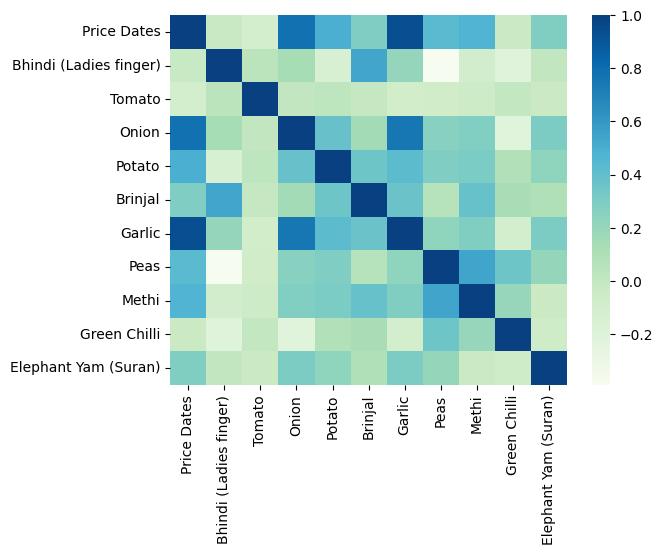

In [32]:
#Create a Correlation matrix
sns.heatmap(prices_corr, cmap = 'GnBu')

In [ ]:
from ipywidgets import interact, interact_manual, widgets

In [33]:
def show_correlation(prices_corr,vegetable1, vegetable2):
    """Analyzes the correlation between two vegetables based on a given correlation matrix.

  Args:
    correlation_matrix: A Pandas DataFrame representing the correlation matrix.
    vegetable1: The name of the first vegetable.
    vegetable2: The name of the second vegetable.

  Returns:
    The correlation value and string describing the strength of the correlation.
  """
    correlation_coefficient = prices_corr.loc[vegetable1,vegetable2]
    
    if correlation_coefficient > 0.8:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} - Very Strong')
    elif correlation_coefficient >= 0.6:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} -Strong')
    elif correlation_coefficient >= 0.4:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} -Moderate')
    elif correlation_coefficient >= 0.2:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} - Weak')
    else:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} -Negligible')
    
    
show_correlation(prices_corr, 'Onion', 'Garlic')

'Onion and Garlic = 0.755 -Strong'

## Time Seriese Analysis

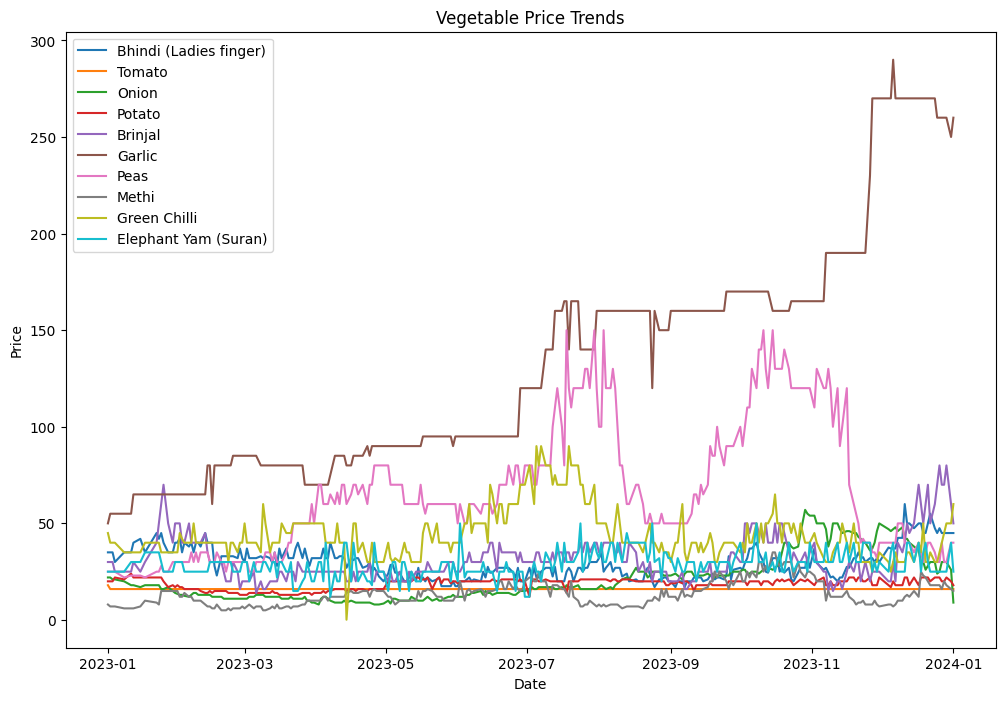

In [20]:
plt.figure(figsize=(12, 8))
for vegetable in prices_df.columns[1:11]:
    plt.plot(prices_df['Price Dates'], prices_df[vegetable], label = vegetable)
                       
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Price Trends')
plt.legend()

## Visualising the Spread

In [21]:
season_averages= prices_df.groupby('Season').mean()
season_averages

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Season,,,,,,,,,,,
Autumn,2023-10-16 03:00:00.000000000,26.500000,16.000000,33.611111,19.472222,30.180556,176.250000,92.486111,18.750000,40.097222,30.680556
Rainy,2023-07-16 13:07:12.000000000,24.140000,16.000000,17.253333,20.066667,32.666667,132.600000,82.400000,13.253333,57.000000,30.360000
Summer,2023-04-15 08:38:24.000000000,28.313333,16.000000,10.500000,16.453333,23.546667,84.466667,56.080000,10.533333,40.455067,25.520000
Winter,2023-05-31 02:35:04.615384576,40.130769,16.030769,21.923077,18.353846,41.476923,142.000000,32.092308,11.200000,37.953846,28.692308


### Creating the Boxplot

In [9]:
# Melt the data to long format
data_melted = prices_df.melt(id_vars='Price Dates', var_name='Vegetable', value_name='Price')

#Convert 'Price' to numeric 
data_melted['Price'] = pd.to_numeric(data_melted['Price'], errors='coerce')

data_melted.head(10)

,Price Dates,Vegetable,Price
0,2023-01-01,Bhindi (Ladies finger),35.0
1,2023-01-02,Bhindi (Ladies finger),35.0
2,2023-01-03,Bhindi (Ladies finger),35.0
3,2023-01-04,Bhindi (Ladies finger),30.0
4,2023-01-08,Bhindi (Ladies finger),35.0
5,2023-01-11,Bhindi (Ladies finger),35.0
6,2023-01-12,Bhindi (Ladies finger),40.0
7,2023-01-15,Bhindi (Ladies finger),42.0
8,2023-01-17,Bhindi (Ladies finger),35.0
9,2023-01-22,Bhindi (Ladies finger),45.0


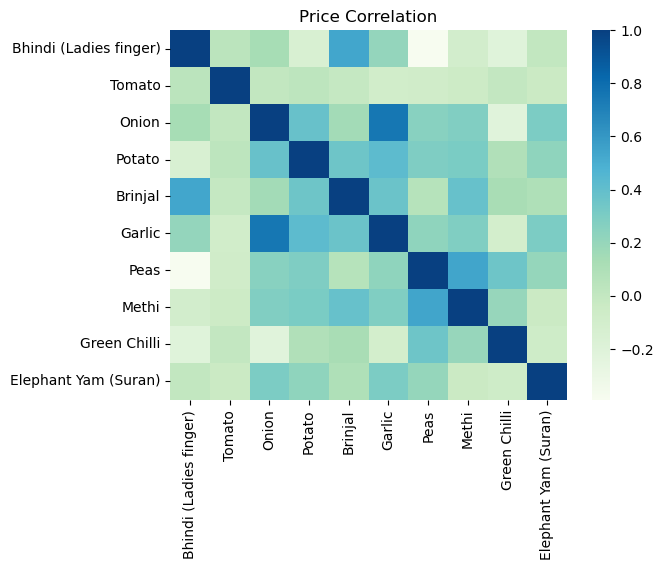

In [26]:
#Create a Correlation matrix
sns.heatmap(prices_corr, cmap = 'GnBu')
plt.title('Price Correlation')

In [32]:
from ipywidgets import interact, interact_manual, widgets

In [46]:
def show_correlation(prices_corr,vegetable1, vegetable2):
    """Analyzes the correlation between two vegetables based on a given correlation matrix.

  Args:
    correlation_matrix: A Pandas DataFrame representing the correlation matrix.
    vegetable1: The name of the first vegetable.
    vegetable2: The name of the second vegetable.

  Returns:
    The correlation value and string describing the strength of the correlation.
  """
    correlation_coefficient = prices_corr.loc[vegetable1,vegetable2]
    
    if correlation_coefficient > 0.8:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} - Very Strong')
    elif correlation_coefficient >= 0.6:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} -Strong')
    elif correlation_coefficient >= 0.4:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} -Moderate')
    elif correlation_coefficient >= 0.2:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} - Weak')
    else:
        return (f'{vegetable1} and {vegetable2} = {correlation_coefficient.round(3)} -Negligible')
    
    
show_correlation(prices_corr, 'Onion', 'Garlic')
    
    

'Onion and Garlic = 0.755 -Strong'

## Time Series Analysis

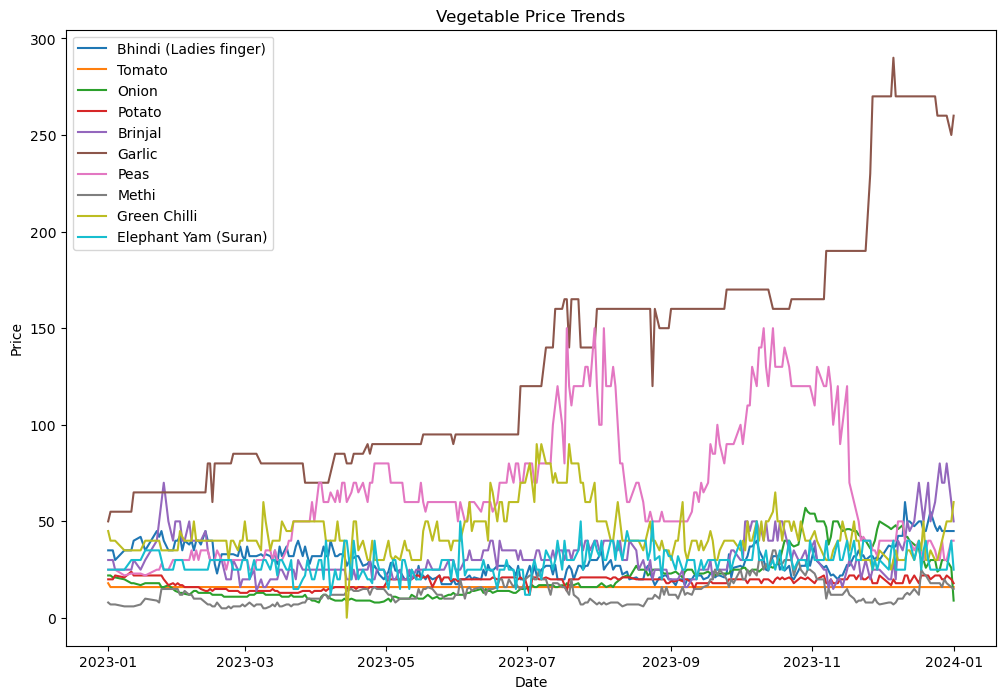

In [56]:
plt.figure(figsize=(12, 8))
for vegetable in prices_df.columns[1:11]:
    plt.plot(prices_df['Price Dates'], prices_df[vegetable], label = vegetable)
                       
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Vegetable Price Trends')
plt.legend()


## Visualising the spead

In [69]:
season_averages= prices_df.groupby('Season').mean()
season_averages

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
Season,,,,,,,,,,
Autumn,26.500000,16.000000,33.611111,19.472222,30.180556,176.250000,92.486111,18.750000,40.097222,30.680556
Rainy,24.140000,16.000000,17.253333,20.066667,32.666667,132.600000,82.400000,13.253333,57.000000,30.360000
Summer,28.313333,16.000000,10.500000,16.453333,23.546667,84.466667,56.080000,10.533333,40.455067,25.520000
Winter,40.130769,16.030769,21.923077,18.353846,41.476923,142.000000,32.092308,11.200000,37.953846,28.692308


#### Creating the boxplot

In [82]:
# Melt the data to long format
data_melted = prices_df.melt(id_vars='Price Dates', var_name='Vegetable', value_name='Price')

#Convert 'Price' to numeric 
data_melted['Price'] = pd.to_numeric(data_melted['Price'], errors='coerce')

data_melted.head(10)

,Price Dates,Vegetable,Price
0,2023-01-01,Bhindi (Ladies finger),35.0
1,2023-01-02,Bhindi (Ladies finger),35.0
2,2023-01-03,Bhindi (Ladies finger),35.0
3,2023-01-04,Bhindi (Ladies finger),30.0
4,2023-01-08,Bhindi (Ladies finger),35.0
5,2023-01-11,Bhindi (Ladies finger),35.0
6,2023-01-12,Bhindi (Ladies finger),40.0
7,2023-01-15,Bhindi (Ladies finger),42.0
8,2023-01-17,Bhindi (Ladies finger),35.0
9,2023-01-22,Bhindi (Ladies finger),45.0


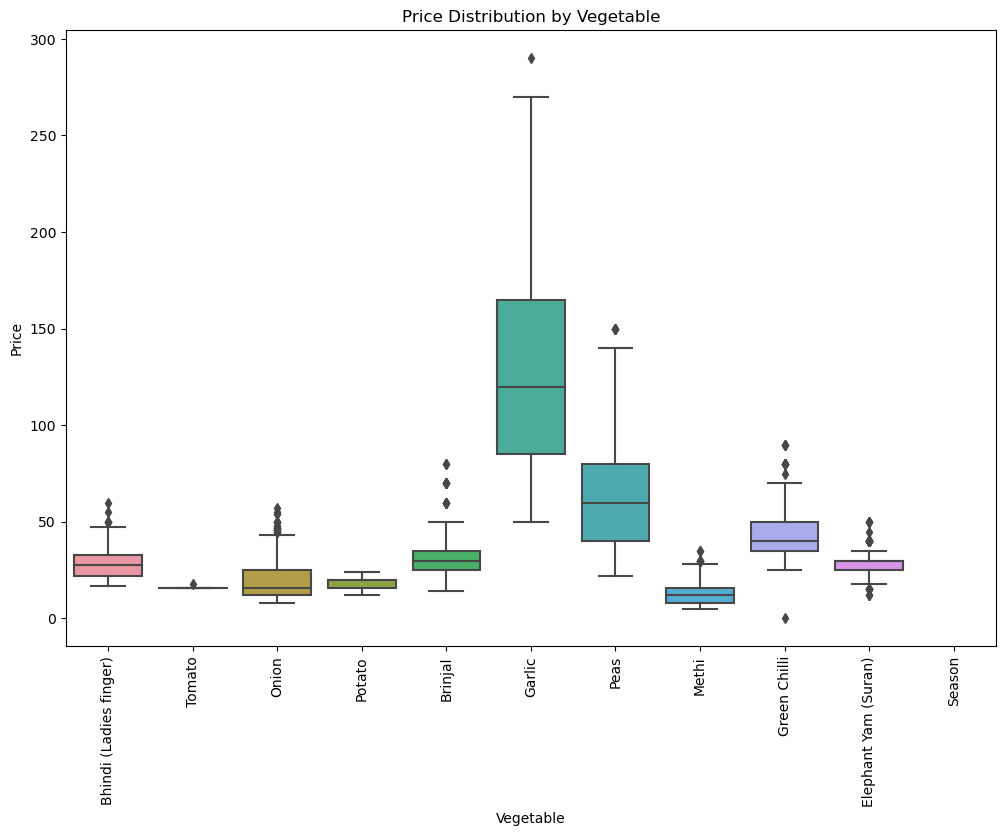

In [80]:
# Create the box plot

plt.figure(figsize=(12, 8))
sns.boxplot(x='Vegetable', y='Price', data=data_melted)
plt.title('Price Distribution by Vegetable')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Identifying the optimal season to buy vegetables
def optimal_season_avg_price(df, vegetable):
    """
    This function calculates the optimal season in which to 
    buy the vegetabled in question, given their prices on 
    specific dates.

    Input: Dataframe columns for vegetable containing daily prices. 

    Output: The season and lowest average price per vegetable
    """
    #Group by season and calculate the average price
    avg_prices = df.groupby('Season')[vegetable].mean().reset_index() #reset_index recreates an index for the results
    
    #Identify the optimal season (season with the lowest average price)
    optimal_season = avg_prices.loc[avg_prices[vegetable].idxmin()]
    
    return optimal_season

In [28]:
optimal_results = {} #Create an empty dictionary to be filled via iteration.
for vegetable in prices_df.columns[1:-2]: #indexed to exclude the columns 'Price Date' and 'Season'
    optimal_season = optimal_season_avg_price(prices_df, vegetable)
    optimal_results[vegetable] = optimal_season

for vegetable, result in optimal_results.items():
    print(f"{vegetable} = Optimal Season: {result['Season']}, Average Price: {result[vegetable]:.2f}")
    print()

Bhindi (Ladies finger) = Optimal Season: Rainy, Average Price: 24.14

Tomato = Optimal Season: Autumn, Average Price: 16.00

Onion = Optimal Season: Summer, Average Price: 10.50

Potato = Optimal Season: Summer, Average Price: 16.45

Brinjal = Optimal Season: Summer, Average Price: 23.55

Garlic = Optimal Season: Summer, Average Price: 84.47

Peas = Optimal Season: Winter, Average Price: 32.09

Methi = Optimal Season: Summer, Average Price: 10.53

Green Chilli = Optimal Season: Winter, Average Price: 37.95



With this analysis, we can see the optimal seasons to buy each vegetable. Seemingly, the Summer season is best to buy wholesale vegetables from this analysis